In [1]:
pwd

'/content'

In [2]:
ls

sample_data/


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [7]:
!unzip /content/drive/MyDrive/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Testing/K/K73.jpg  
  inflating: dataset/Testing/K/K74.jpg  
  inflating: dataset/Testing/K/K75.jpg  
  inflating: dataset/Testing/K/K76.jpg  
  inflating: dataset/Testing/K/K77.jpg  
  inflating: dataset/Testing/K/K78.jpg  
  inflating: dataset/Testing/K/K79.jpg  
  inflating: dataset/Testing/K/K8.jpg  
  inflating: dataset/Testing/K/K80.jpg  
  inflating: dataset/Testing/K/K81.jpg  
  inflating: dataset/Testing/K/K82.jpg  
  inflating: dataset/Testing/K/K83.jpg  
  inflating: dataset/Testing/K/K84.jpg  
  inflating: dataset/Testing/K/K85.jpg  
  inflating: dataset/Testing/K/K86.jpg  
  inflating: dataset/Testing/K/K87.jpg  
  inflating: dataset/Testing/K/K88.jpg  
  inflating: dataset/Testing/K/K89.jpg  
  inflating: dataset/Testing/K/K9.jpg  
  inflating: dataset/Testing/K/K90.jpg  
  inflating: dataset/Testing/K/K91.jpg  
  inflating: dataset/Testing/K/K92.jpg  
  inflating: dataset/Testing/K/K93.jpg  
  inflat

IMPORTING IMAGEDATAGENERATOR LIBRARY AND CONFIGURING IT

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

APPLYING IMAGEDATAGENERATOR FUNCTIONALITY TO TRAIN AND TEST SET

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
ls

 179369.pdf                     821319104009-MA8402.pdf
 821319104009-CS8351.pdf        821319104009.OEC552-SC.pdf
 821319104009-CS8392.pdf       '821319104027 CS8451.pdf'
 821319104009-CS8491.pdf       'Colab Notebooks'/
 821319104009-CS8492.pdf        dataset/
 821319104009-CS8493.pdf        dataset.zip
 821319104009-CS8494.pdf       'DINESHKUMAR 821319104009.MA8551.pdf'
 821319104009-CS8501.pdf        flower.h5
 821319104009.CS8591-CN.pdf     flowers/
 821319104009.CS8592-OOAD.pdf   Flowers-Dataset.zip
 821319104009-EC8395.pdf       'Getting started.pdf'
 821319104009.EC8691.MPMC.pdf


In [12]:
pwd

'/content/drive/MyDrive'

In [14]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Training",target_size=(64,64),
                                          class_mode='categorical',batch_size=24)

Found 3654 images belonging to 36 classes.


In [15]:
 x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Testing",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 3077 images belonging to 36 classes.


In [16]:
x_train.class_indices

{'1': 0,
 '10': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35}

In [59]:
y_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Training",target_size=(64,64),
                                          class_mode='categorical',batch_size=24)

Found 3654 images belonging to 36 classes.


In [60]:
 y_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Testing",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 3077 images belonging to 36 classes.


In [63]:
y_test.class_indices

{'1': 0,
 '10': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35}

IMPORTING THE REQUIRED MODEL BUILDING LIBRARIES

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,Flatten,MaxPooling2D

INITIALIZING THE MODEL

In [18]:
model=Sequential()

ADDING THE CONVOLUTIONAL MODEL

In [19]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

ADDING THE POOLING(MAX) LAYER

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

ADDING THE FLATTEN LAYER

In [27]:
model.add(Flatten())

ADDING THE DENSE LAYER

In [28]:
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 1000)              30753000  
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 1000)              501000    
                                                        

COMPILING THE MODEL

In [37]:
model.add(Dense(36,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
len(x_test)


129

In [34]:
len(x_train)

153

FIT THE MODEL

In [38]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
153/153 [==============================] - 91s 589ms/step - loss: 3.6025 - accuracy: 0.0271 - val_loss: 3.5968 - val_accuracy: 0.0292
Epoch 2/10
153/153 [==============================] - 89s 580ms/step - loss: 3.6008 - accuracy: 0.0274 - val_loss: 3.6039 - val_accuracy: 0.0279
Epoch 3/10
153/153 [==============================] - 88s 578ms/step - loss: 3.6000 - accuracy: 0.0255 - val_loss: 3.5945 - val_accuracy: 0.0279
Epoch 4/10
153/153 [==============================] - 89s 580ms/step - loss: 3.5928 - accuracy: 0.0274 - val_loss: 3.5896 - val_accuracy: 0.0279
Epoch 5/10
153/153 [==============================] - 89s 583ms/step - loss: 3.5890 - accuracy: 0.0268 - val_loss: 3.5870 - val_accuracy: 0.0279
Epoch 6/10
153/153 [==============================] - 88s 574ms/step - loss: 3.5871 - accuracy: 0.0235 - val_loss: 3.5855 - val_accuracy: 0.0279
Epoch 7/10
153/153 [==============================] - 92s 603ms/step - loss: 3.5859 - accuracy: 0.0249 - val_loss: 3.5847 - val_ac

SAVING THE MODEL

In [39]:
model.save('SIGN.h5')

TESTING

IMPORTING THE PACKAGES AND LOAD THE SAVED MODEL

In [53]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [49]:
model=load_model('SIGN.h5')

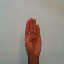

In [69]:
img=image.load_img(r"/content/drive/MyDrive/dataset/Testing/B/B100.jpg",target_size=(64,64))
img

In [71]:
x=image.img_to_array(img)
x

array([[[164., 170., 158.],
        [164., 172., 175.],
        [156., 173., 163.],
        ...,
        [159., 157., 144.],
        [157., 155., 140.],
        [160., 148., 126.]],

       [[149., 169., 170.],
        [157., 172., 167.],
        [157., 172., 169.],
        ...,
        [150., 153., 144.],
        [149., 158., 129.],
        [154., 148., 136.]],

       [[170., 170., 168.],
        [168., 168., 170.],
        [163., 169., 167.],
        ...,
        [161., 154., 135.],
        [151., 150., 145.],
        [153., 148., 126.]],

       ...,

       [[119., 141., 129.],
        [138., 134., 123.],
        [130., 139., 138.],
        ...,
        [145., 140., 144.],
        [137., 139., 136.],
        [137., 136., 132.]],

       [[140., 136., 133.],
        [126., 139., 130.],
        [132., 139., 121.],
        ...,
        [133., 144., 130.],
        [135., 141., 141.],
        [129., 140., 142.]],

       [[124., 138., 141.],
        [131., 142., 134.],
        [131., 1

In [72]:
x=np.expand_dims(x,axis=0)
x

array([[[[164., 170., 158.],
         [164., 172., 175.],
         [156., 173., 163.],
         ...,
         [159., 157., 144.],
         [157., 155., 140.],
         [160., 148., 126.]],

        [[149., 169., 170.],
         [157., 172., 167.],
         [157., 172., 169.],
         ...,
         [150., 153., 144.],
         [149., 158., 129.],
         [154., 148., 136.]],

        [[170., 170., 168.],
         [168., 168., 170.],
         [163., 169., 167.],
         ...,
         [161., 154., 135.],
         [151., 150., 145.],
         [153., 148., 126.]],

        ...,

        [[119., 141., 129.],
         [138., 134., 123.],
         [130., 139., 138.],
         ...,
         [145., 140., 144.],
         [137., 139., 136.],
         [137., 136., 132.]],

        [[140., 136., 133.],
         [126., 139., 130.],
         [132., 139., 121.],
         ...,
         [133., 144., 130.],
         [135., 141., 141.],
         [129., 140., 142.]],

        [[124., 138., 141.],
       

In [73]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 105ms/step


array([22])

In [89]:
img=image.load_img(r"/content/drive/MyDrive/dataset/Testing/N/N481.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['1','10','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
index[y[0]]

1/1 [==============================] - 0s 162ms/step


'N'